# 1. Introduction:

## 1.1 Brief about the dataset

The California Housing Prices Dataset originates from the 1990 California census, providing a comprehensive glimpse into the real estate landscape of the state during that period. This dataset has been employed in various research studies, notably in the book found [here](https://github.com/ageron/handson-ml/tree/master/datasets/housing), serving as a foundation for understanding end-to-end machine learning project workflows.

The dataset captures essential attributes of properties such as median income, housing median age, average rooms, and more. Furthermore, each entry corresponds to a block group, which represents the smallest geographic unit for which the U.S. Census Bureau releases sample data. These block groups, often containing a population ranging between 600 to 3,000 people, offer granularity in understanding housing trends and patterns.

However, it's worth noting that this dataset has undergone minor modifications from its original form:

207 values from the total_bedrooms column were deliberately omitted, introducing the challenge of handling missing data.
An additional categorical attribute, ocean_proximity, was introduced. This attribute provides a rough classification of a block group's proximity to significant water bodies, including the ocean, the Bay area, or whether it's inland or on an island.
This dataset can be accessed on Kaggle through this [link](https://www.kaggle.com/datasets/harrywang/housing?resource=download&select=housing.csv).

## 1.2 Objective of the Analysis

In the dynamic realm of real estate, setting the right price for properties is paramount. As a part of the Udacity hackathon, our goal is to harness the power of this dataset to construct a sophisticated real estate price estimator. This tool aims to predict market prices for properties based on a range of attributes, facilitating informed decisions for potential buyers and sellers.

The challenge unfolds as follows:

Data Analysts: Delve into the dataset to unravel complex relationships between property features and their corresponding market values.
AI Engineers: Employ advanced regression techniques, surpassing the scope of just linear regression, to ensure the estimator predicts housing prices with high accuracy based on the given attributes.
Web Developers: Design and develop a user-centric platform where individuals can seamlessly input property specifics and obtain accurate price estimates.
By the culmination of this project, we aspire to offer an intuitive, accurate, and efficient tool that democratizes property price estimation, making it accessible and understandable for all.





----
# 2. Data Loading and Overview:

## 2.1 Load the dataset
## 2.2 Initial glance at the data using methods like `head()`, `info()`.

In [1]:
#This section begins by importing the required library pandas.
# Then, it loads a dataset named 'housing.csv' into a DataFrame called df.
#The head() method displays the first few rows of the dataset.
import joblib
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## The dataset consists of the following columns:

* `longitude and latitude`: Geographic coordinates of the block.
* `housing_median_age`: Median age of the houses in the block.
* `total_rooms`: Total number of rooms in the block.
* `total_bedrooms`: Total number of bedrooms in the block.
* `population`: Total population of the block.
* `households`: Total number of households in the block.
* `median_income`: Median income of the people in the block.
* `median_house_value`: The target variable, which is the median value of the houses in the block.
* `ocean_proximity`: Categorical variable indicating the block's proximity to the ocean.

----------
# 3. Exploratory Data Analysis (EDA):
## 3.1 Data Summary and Missing Values
### 3.1.1 Check for missing values

In [2]:
missing_values = df.isnull().sum()
missing_values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

* The `total_bedrooms` column has 207 missing values.

### 3.1.2 Summary statistics using `describe()` or `value_counts()`.

In [3]:
# Getting the summary statistics for the dataset
summary_stats = df.describe()
summary_stats


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


* The dataset has a total of 20,640 observations.
* The `median_house_value` ranges from **14,999 USD** to **500,001 USD**, with a mean of approximately **206,855 USD**.
* Other columns also have a diverse range of values, which might necessitate scaling or normalization.

* longitude and latitude: The dataset covers a range of latitudes and longitudes, presumably representing locations within California.
* housing_median_age: The age of houses varies from 1 to 52 years, with a median age of 29 years.
* total_rooms and total_bedrooms: These columns have a wide range of values. We might want to consider creating a feature representing the average number of rooms or bedrooms per household.
* population: This also has a broad range, with some blocks having as few as 3 people and others having up to 35,682 people.
* households: The number of households per block varies widely as well.
* median_income: The median income ranges from 0.4999 (probably in tens of thousands) to 15.0001.
* median_house_value: The target variable ranges from $14,999 to $500,001. The maximum value appears to be capped.

## 3.2 Data Visualization
### 3.2.1 Distribution of target variable

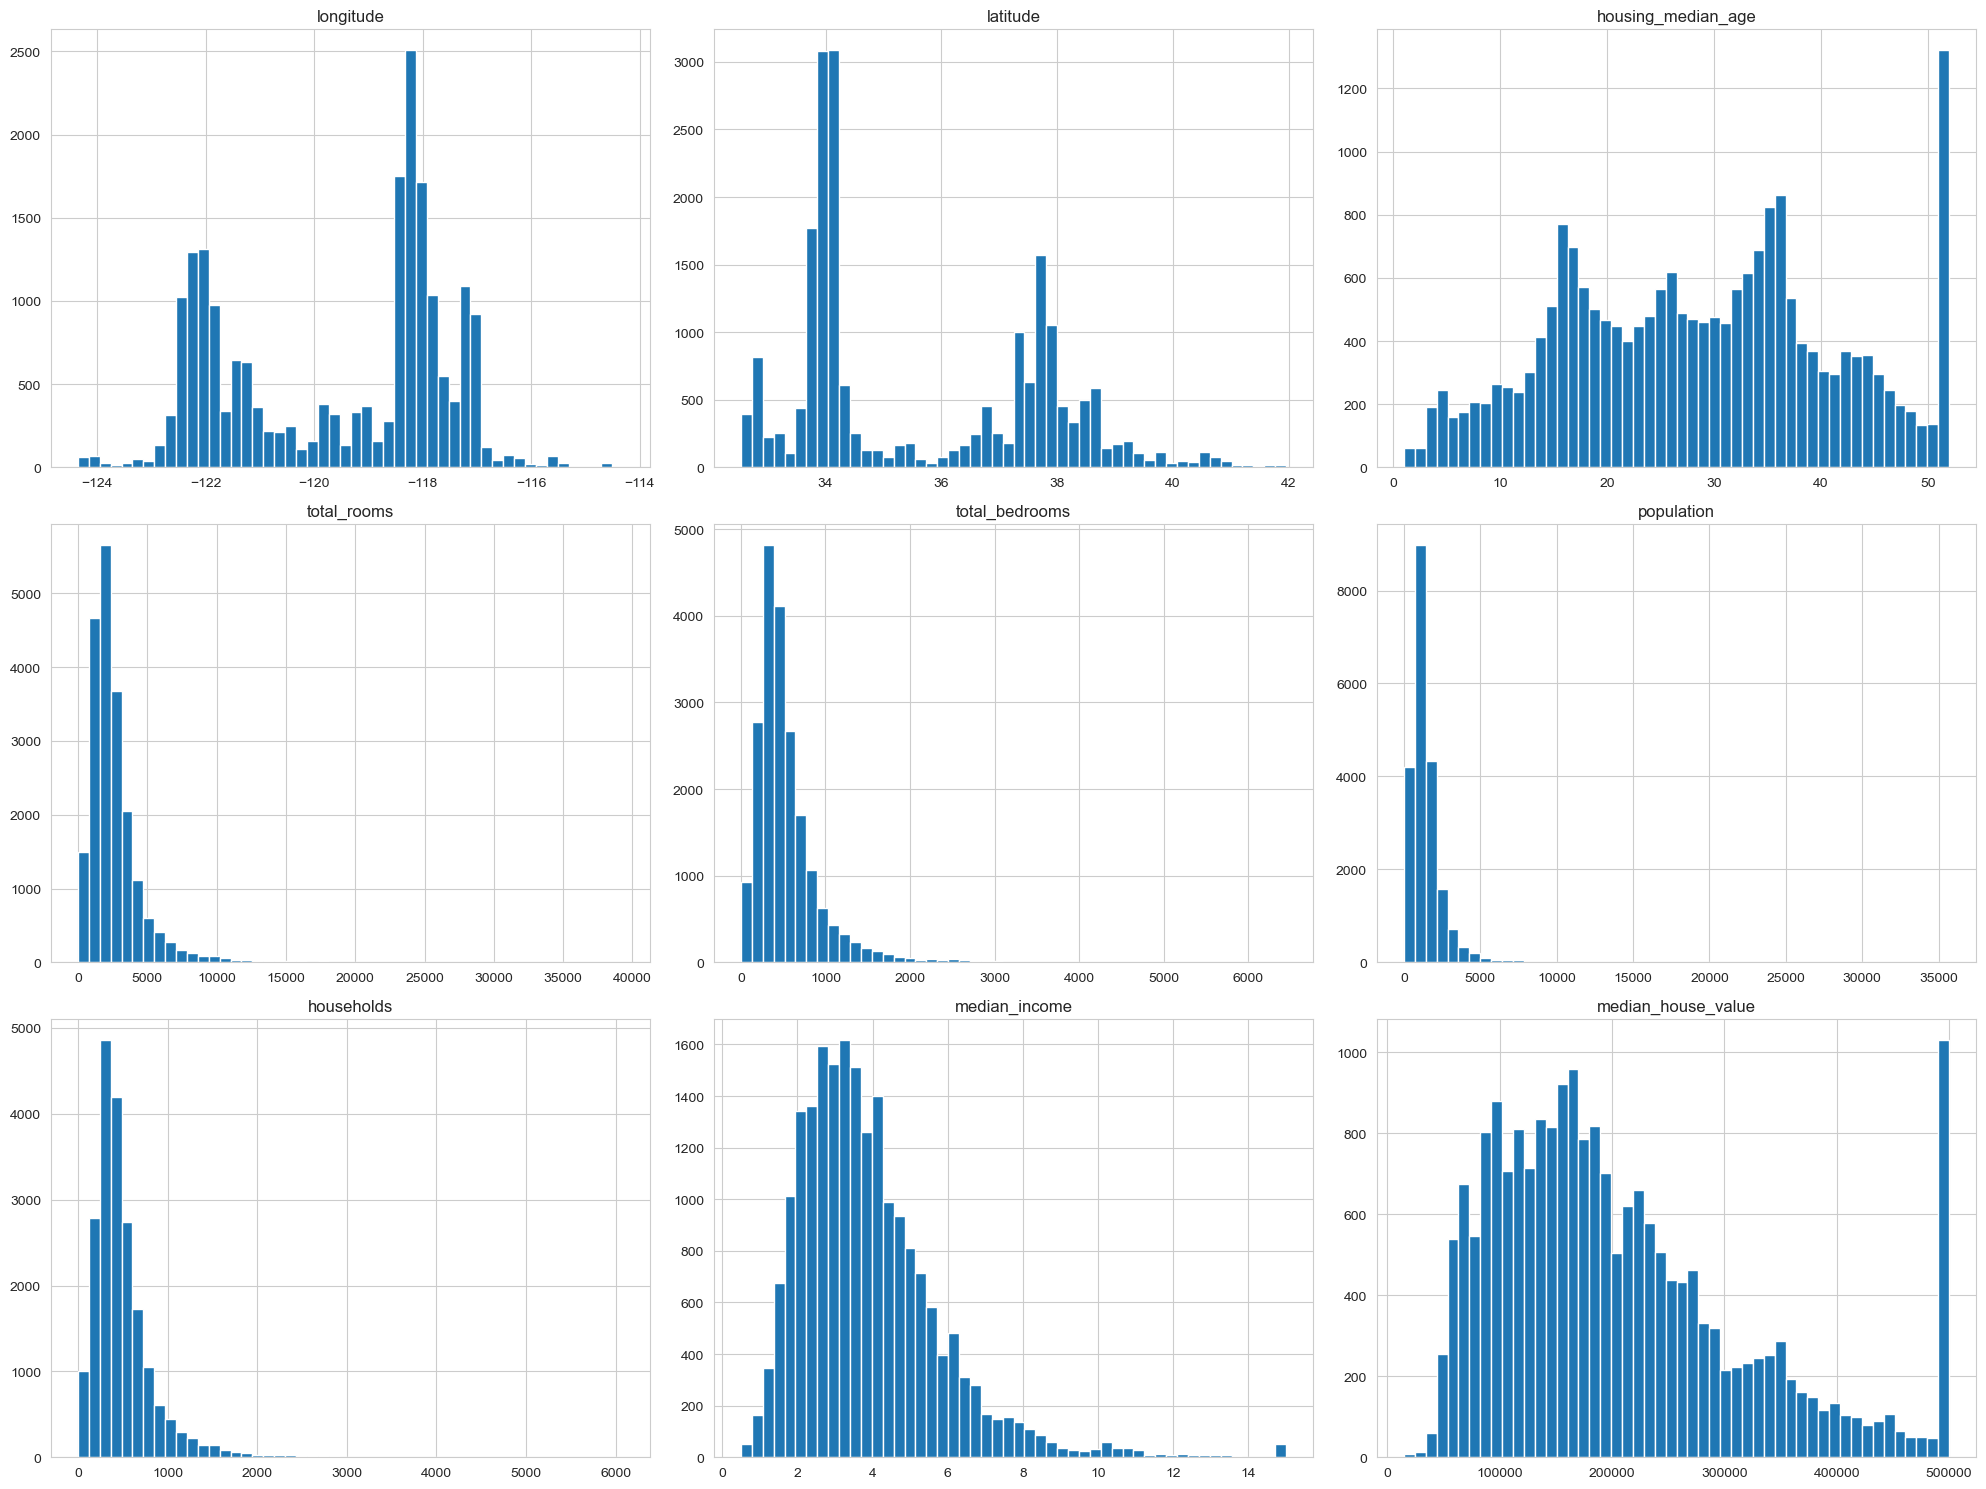

In [4]:
# Importing necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style for the plots to have a white background with gridlines
sns.set_style("whitegrid")

# Generating histograms for all numerical columns in the DataFrame
# This provides a quick overview of the distribution of data in each column.
df.hist(bins=50, figsize=(20,15))

# Adjusting the spacing between subplots to ensure they are spaced out and clearly visible
plt.tight_layout()

# Displaying the generated plots
plt.show()

* `housing_median_age` and `median_house_value`: These columns appear to have been capped. For instance, housing_median_age has a spike at 52, and median_house_value has one at `$500,000`. This may pose a problem, especially for the target variable, as the model might not predict values beyond the cap.
* `median_income`: The income data has been scaled and capped at 15 for higher median incomes and at 0.5 for lower  `median incomes`. The numbers likely represent tens of thousands of dollars (e.g., 3 indicates about `$30,000`).
* `ocean_proximity`: It's a categorical attribute, so we don't see it in the histogram. We'll need to explore it separately.
* The other attributes have varying scales, which means we might need to consider feature scaling during the preprocessing phase.

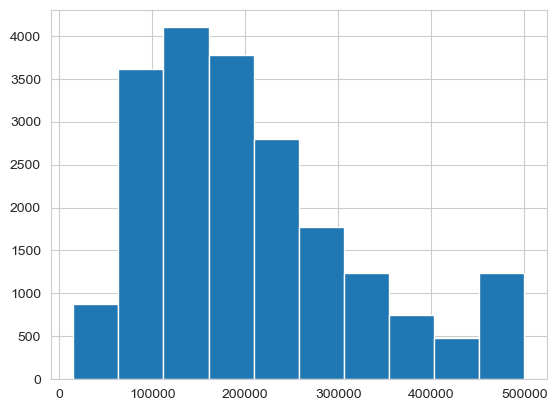

In [5]:
median_house_value_distribution = df['median_house_value'].hist()

* `median_house_value` has a wide distribution, with values spanning from the low to high end. While there is a general bell-shaped curve to the histogram, the spike at $500,000 is not typical of a perfectly normal distribution. The spike indicates an artificial cap or a clustering of data points at that value.



### 3.2.2 Visualizing relationships between variables using count values, scatter plots, boxplots, etc

In [6]:
ocean_proximity_distribution = df['ocean_proximity'].value_counts()
ocean_proximity_distribution

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

The distribution of values in the `ocean_proximity` column of the dataset:

1. **<1H OCEAN**: There are 9,136 blocks (or entries) in the dataset that are located less than an hour away from the ocean.
2. **INLAND**: 6,551 blocks are categorized as being inland, meaning they are situated further away from the ocean.
3. **NEAR OCEAN**: 2,658 blocks are located near the ocean but not necessarily within an hour's distance.
4. **NEAR BAY**: 2,290 blocks are situated near a bay.
5. **ISLAND**: Only 5 blocks in the dataset are classified as being on an island.

From this distribution, it's evident that the majority of blocks are either less than an hour away from the ocean or are inland. The least represented category is `ISLAND`, which only has 5 entries.

## Next Steps for EDA:
1. Handle the missing values in `total_bedrooms`.
2. Visualize the relationship between various features and the target variable (`median_house_value`).
3. Investigate the correlation between features to understand multicollinearity.

----
# 4. Data Cleaning:

* Outliers: Deal with outliers as they can affect the model
* Missing Values: To handle the missing values in the `total_bedrooms` column, we will use KNN imputation. This method can provide more accurate imputations by considering the 'k' closest samples in the feature space.

## 4.1 Handling missing values


In [7]:
# Importing the KNNImputer class from the sklearn.impute module.
# KNNImputer is used to impute (or fill) missing values using the k-nearest neighbors algorithm (KNN).
from sklearn.impute import KNNImputer

# Creating an instance of the KNNImputer class.
# The parameter 'n_neighbors=5' specifies that for each missing value, the imputer will look at the 5 nearest neighbors
# and use their values to determine the imputed value (typically an average of these neighbors).
imputer = KNNImputer(n_neighbors=5)

# Creating a copy of the original DataFrame 'df' to ensure that the original data remains unchanged.
# This is a common practice to avoid modifying the original data, especially when the transformation 
# or operation might be irreversible.
df_imputed = df.copy()

# Using the 'fit_transform' method of the imputer to fill in missing values in the 'total_bedrooms' column.
# The result (which is a 2D array) is then converted back to a DataFrame format and replaces the old 'total_bedrooms' column.
# This step is crucial as the 'total_bedrooms' column might have missing values which need to be filled in.
df_imputed[['total_bedrooms']] = imputer.fit_transform(df[['total_bedrooms']])
# joblib.dump(imputer, 'imputer.pkl')

# Compute means after KNN imputation
feature_means = df_imputed.mean()

# Save the means for later use during inference
joblib.dump(feature_means, 'feature_means.pkl')


# Checking the number of missing values in each column of the 'df_imputed' DataFrame after the imputation.
# This is done using the 'isnull()' method which returns a DataFrame of the same shape as the original but with 
# boolean values indicating the presence of missing data. 
# The 'sum()' method is then applied to count the number of missing values in each column.
missing_values_after_imputation = df_imputed.isnull().sum()
missing_values_after_imputation

df.head()
# df_imputed.head()

/var/folders/j6/4xb6xrzn0p13yqr5ry1s0djr0000gn/T/ipykernel_93303/526820470.py:22: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  feature_means = df_imputed.mean()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The KNN imputation has successfully addressed the missing values in the total_bedrooms column. There are no more missing values in the dataset.

## 4.1 Addressing outliers

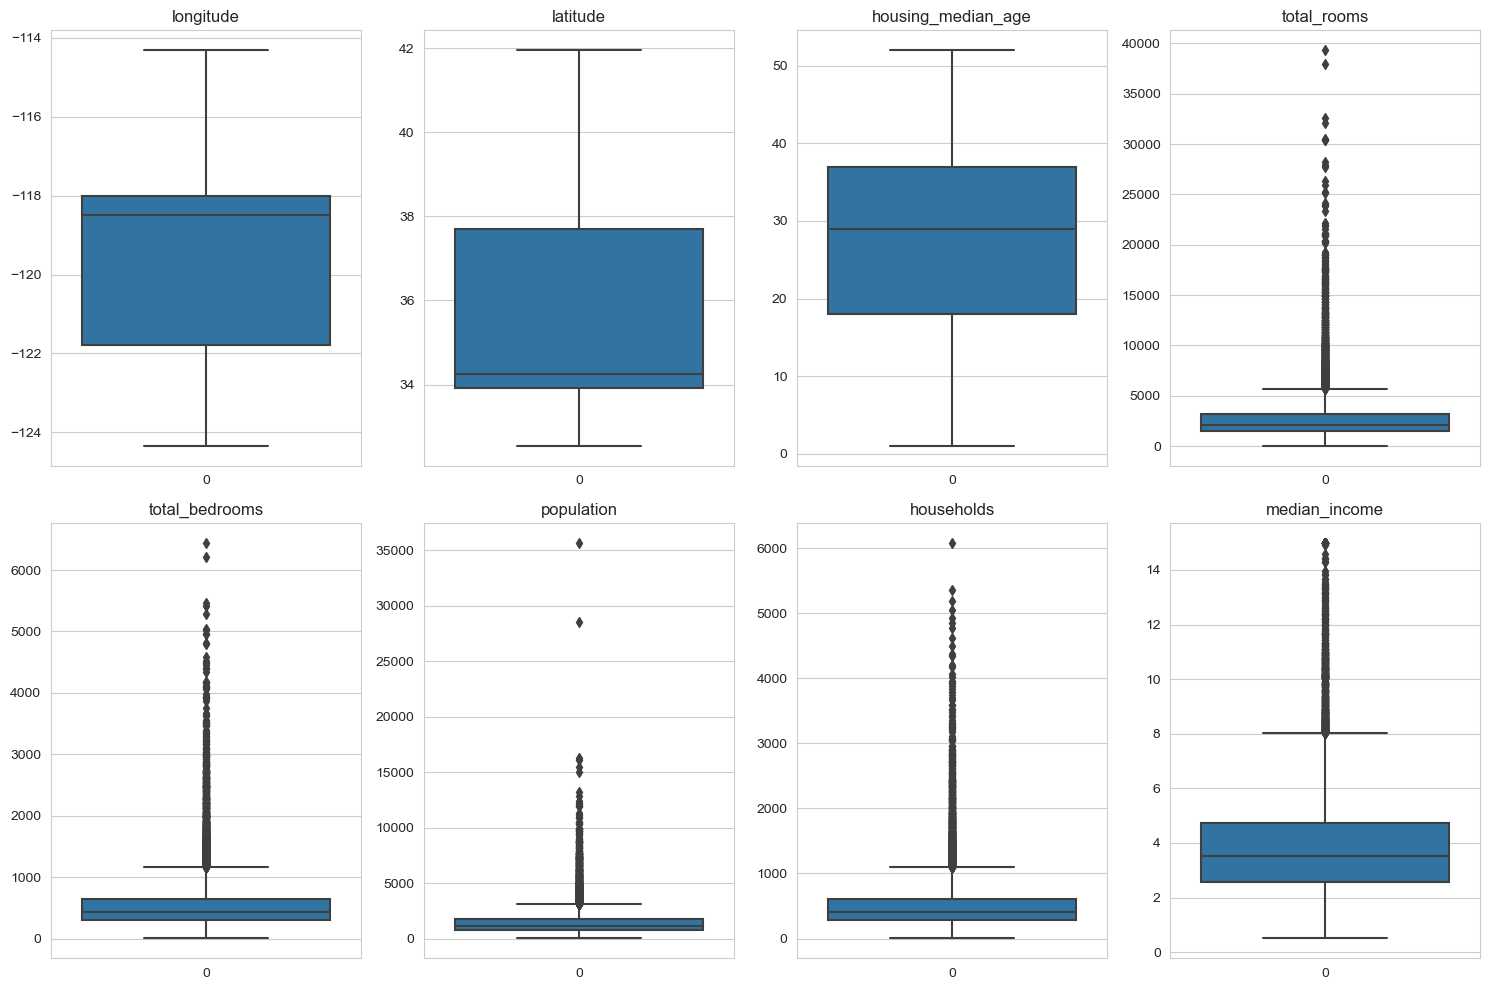

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing potential outliers using box plots for each numerical feature
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
                      'population', 'households', 'median_income']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(df_imputed[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

The box plots give a visual representation of the distribution of the numerical features and potential outliers. Here are some observations:

* **Longitude and Latitude**: These seem to be fairly well-distributed without extreme outliers.
* **Housing Median Age**: Some higher values are seen, but they seem reasonable and may not be considered outliers.
* Total Rooms, Total Bedrooms, Population, and Households: These features have some potential outliers on the higher end.
* **Median Income**: This feature also has some potential outliers on the higher end.

To handle outliers, there are a few strategies we can consider:
* **Winsorizing**: This method involves clipping the data at a specific percentile. For instance, anything above the 99th percentile can be set to the value at the 99th percentile.
* **Log Transformation**: Applying a log transformation can help reduce the impact of outliers, especially for right-skewed distributions.
Before deciding on the method, let's check the distribution of these features to determine if a log transformation might be beneficial.
* **Capping at the 99th Percentile**

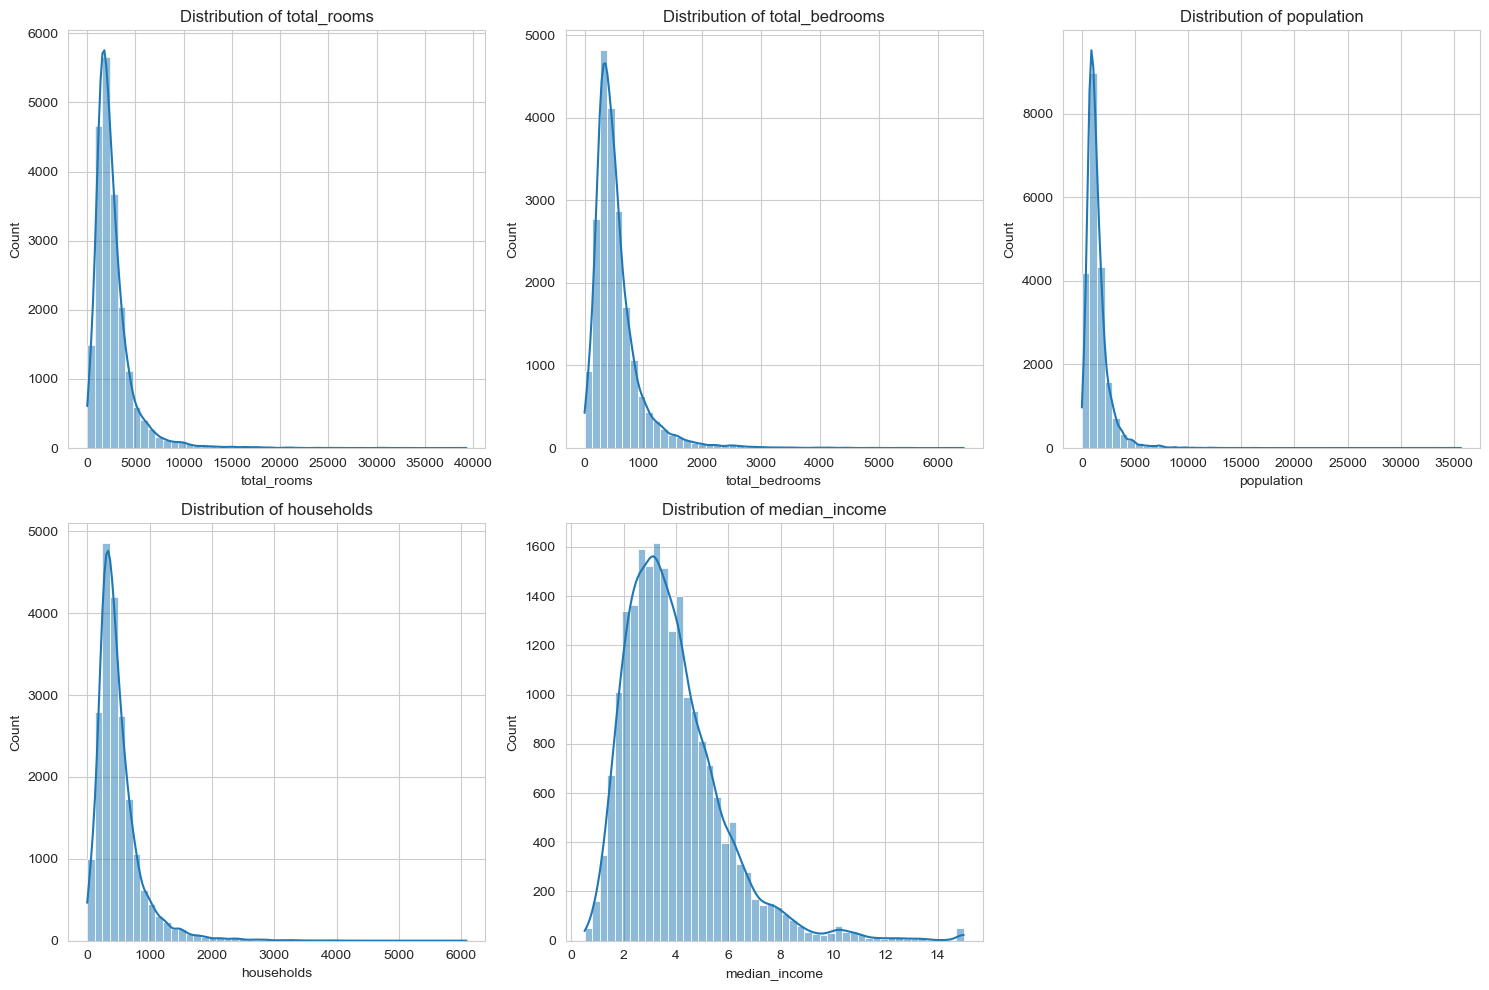

In [9]:
features_to_check = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features_to_check, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_imputed[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

The histograms provide insights into the distribution of the features:
* Total Rooms, Total Bedrooms, Population, and Households: These features are right-skewed with a long tail towards the higher values. This means that a log transformation might be beneficial to make the distributions more symmetric and reduce the impact of outliers.
* Median Income: This feature is also right-skewed but not as prominently as the others. A log transformation could still be beneficial.

Given the right-skewed distributions, We will identify and handle outliers by using log transformation or 99th capping.


the log transformation vs. capping at the 99th percentile:

1. **Log Transformation**: This approach works well for right-skewed distributions by compressing the long tails and expanding the lower end of the distribution. It doesn't remove outliers but reduces their impact. The advantage is that it retains all data points while making the distribution more symmetric.
  
2. **Capping at the 99th Percentile**: This method involves setting a hard cap, usually based on a specific percentile, and any value above this cap is set to the cap's value. This method can sometimes be seen as too aggressive since it might modify a significant portion of the data and may not always be appropriate, especially if genuine large values are common in the dataset.

In this case, based on the distributions and the nature of the data, the log transformation seems more suitable. It addresses the skewness in the distribution without being as aggressive as capping. 

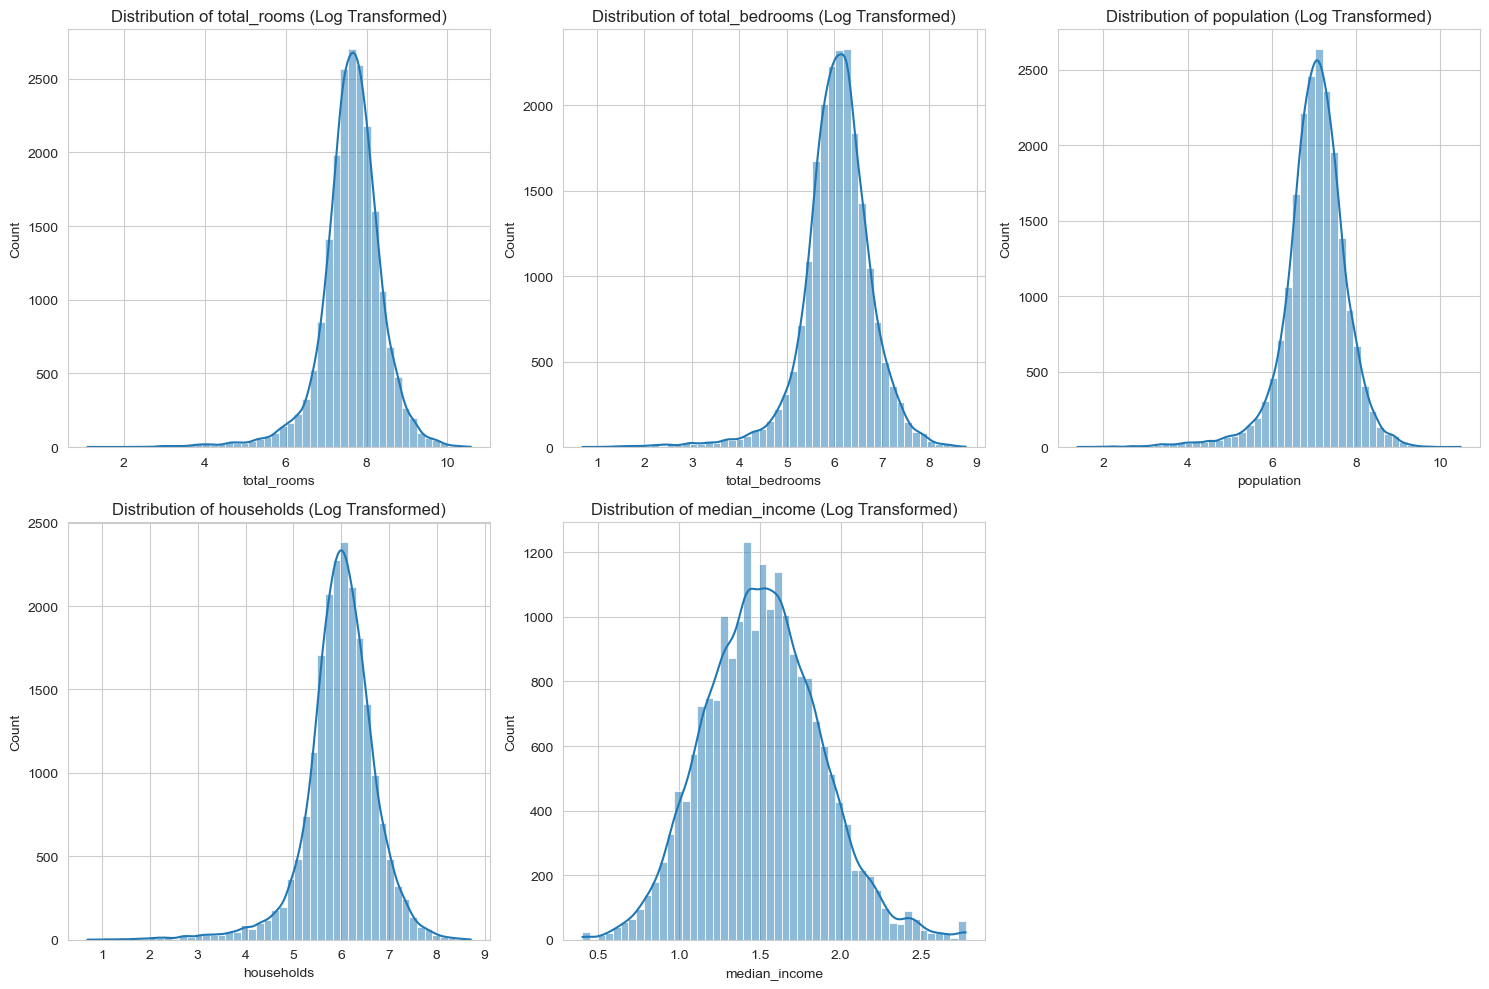

In [10]:
import numpy as np

df_log_transformed = df_imputed.copy()

# Applying the log transformation to the skewed features again
for col in features_to_check:
    df_log_transformed[col] = np.log1p(df_log_transformed[col])

# Visualizing the distributions after log transformation
plt.figure(figsize=(15, 10))
for i, col in enumerate(features_to_check, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_log_transformed[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} (Log Transformed)')
    plt.tight_layout()

plt.show()


## Check the Coefficient of Variation for Features before and after log transformation:
The coefficient of variation (CV) is a measure of relative variability. It is the ratio of the standard deviation to the mean and can help identify features with high variability relative to their mean. Let's calculate the CV for the numerical columns.

In [11]:
# Calculating coefficient of variation for numerical columns
coefficient_of_variation = (df_imputed[numerical_features].std() / df_imputed[numerical_features].mean()) * 100
coefficient_of_variation

longitude             -1.675618
latitude               5.994501
housing_median_age    43.944774
total_rooms           82.769778
total_bedrooms        77.949349
population            79.444447
households            76.536413
median_income         49.082490
dtype: float64

In [12]:
# Calculating coefficient of variation for numerical columns
coefficient_of_variation = (df_log_transformed[numerical_features].std() / df_log_transformed[numerical_features].mean()) * 100
coefficient_of_variation

longitude             -1.675618
latitude               5.994501
housing_median_age    43.944774
total_rooms            9.830306
total_bedrooms        11.943951
population            10.479499
households            12.143300
median_income         23.643941
dtype: float64

### Original (After KNN Imputation):
- `longitude`: -1.68% 
- `latitude`: 5.99% 
- `housing_median_age`: 43.94% 
- `total_rooms`: 82.77% 
- `total_bedrooms`: 77.95% 
- `population`: 79.44% 
- `households`: 76.54% 
- `median_income`: 49.08% 

### Log-Transformed:
- `longitude`: -1.68% 
- `latitude`: 5.99% 
- `housing_median_age`: 43.94% 
- `total_rooms`: 9.83% 
- `total_bedrooms`: 11.94% 
- `population`: 10.48% 
- `households`: 12.14% 
- `median_income`: 23.64%

### Analysis:
- The CV for `longitude` and `latitude` remains unchanged, as expected, because we didn't apply any transformations to these columns.
- After the log transformation, there is a significant reduction in CV for the columns `total_rooms`, `total_bedrooms`, `population`, `households`, and `median_income`. This indicates that the log transformation has made the distribution of these columns more compact relative to their mean.
- The CV values for the columns after log transformation are much lower, signifying that the variability of these columns relative to their mean has decreased.

### Suggestions:
1. **Log Transformation Benefits**: The log transformation has certainly helped in reducing the relative variability of the features. This is often desirable as it might lead to better model performance, especially when using linear models.
2. **Effect on Outliers**: The log transformation inherently reduces the impact of outliers. The reduced CV suggests that the distributions of the columns have become less skewed, which might help in achieving better model generalization.
3. **When to apply CV**: Ideally, the CV should be calculated after any data preprocessing, including outlier treatment, transformation, etc. This is because the CV gives a measure of relative variability, and any preprocessing can change the distributions of the features, thus affecting the CV. In your case, checking CV after transformations is appropriate.

In conclusion, the log transformation appears to be beneficial for the dataset, especially for the features we transformed. It's making the data less variable and potentially more suitable for modeling.

## Let's move on to the next steps:

* Visualize the relationship between various features and the target variable (`median_house_value`).
* Investigate the correlation between features to understand multicollinearity.


### Plotting before log transform

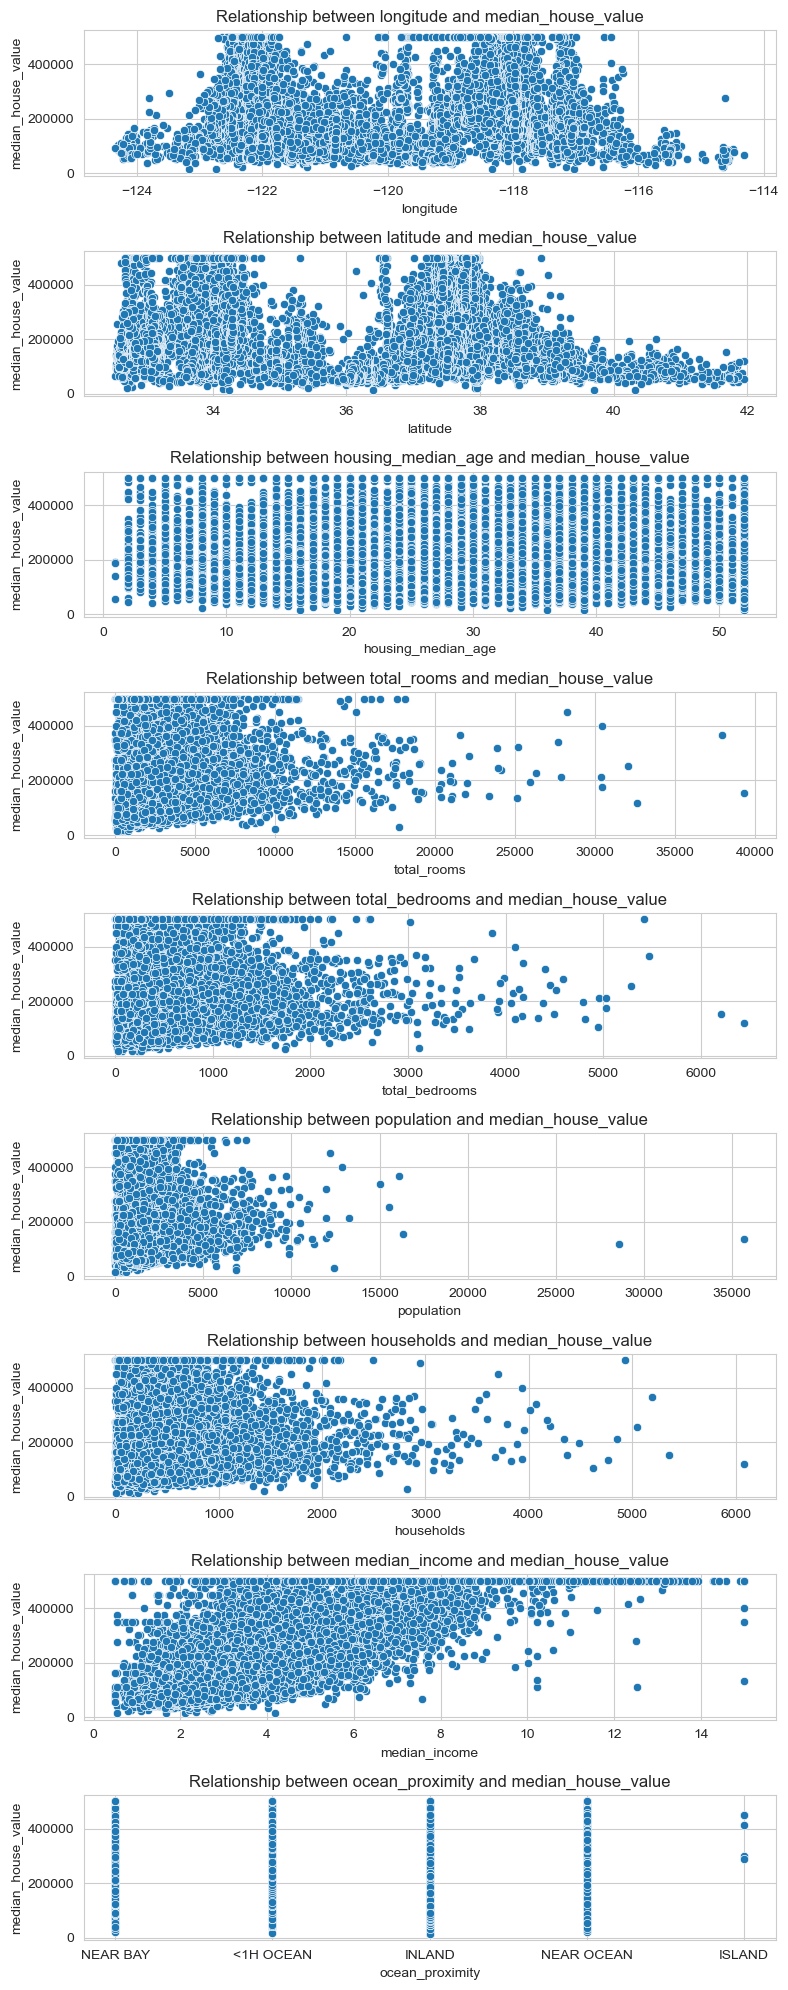

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
                     'population', 'households', 'median_income', 'ocean_proximity']
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(8, 20))

for i, col in enumerate(numerical_columns):
    sns.scatterplot(data=df, x=col, y='median_house_value', ax=axes[i])
    axes[i].set_title(f'Relationship between {col} and median_house_value')

plt.tight_layout()
plt.show()

### Plotting after log transform:

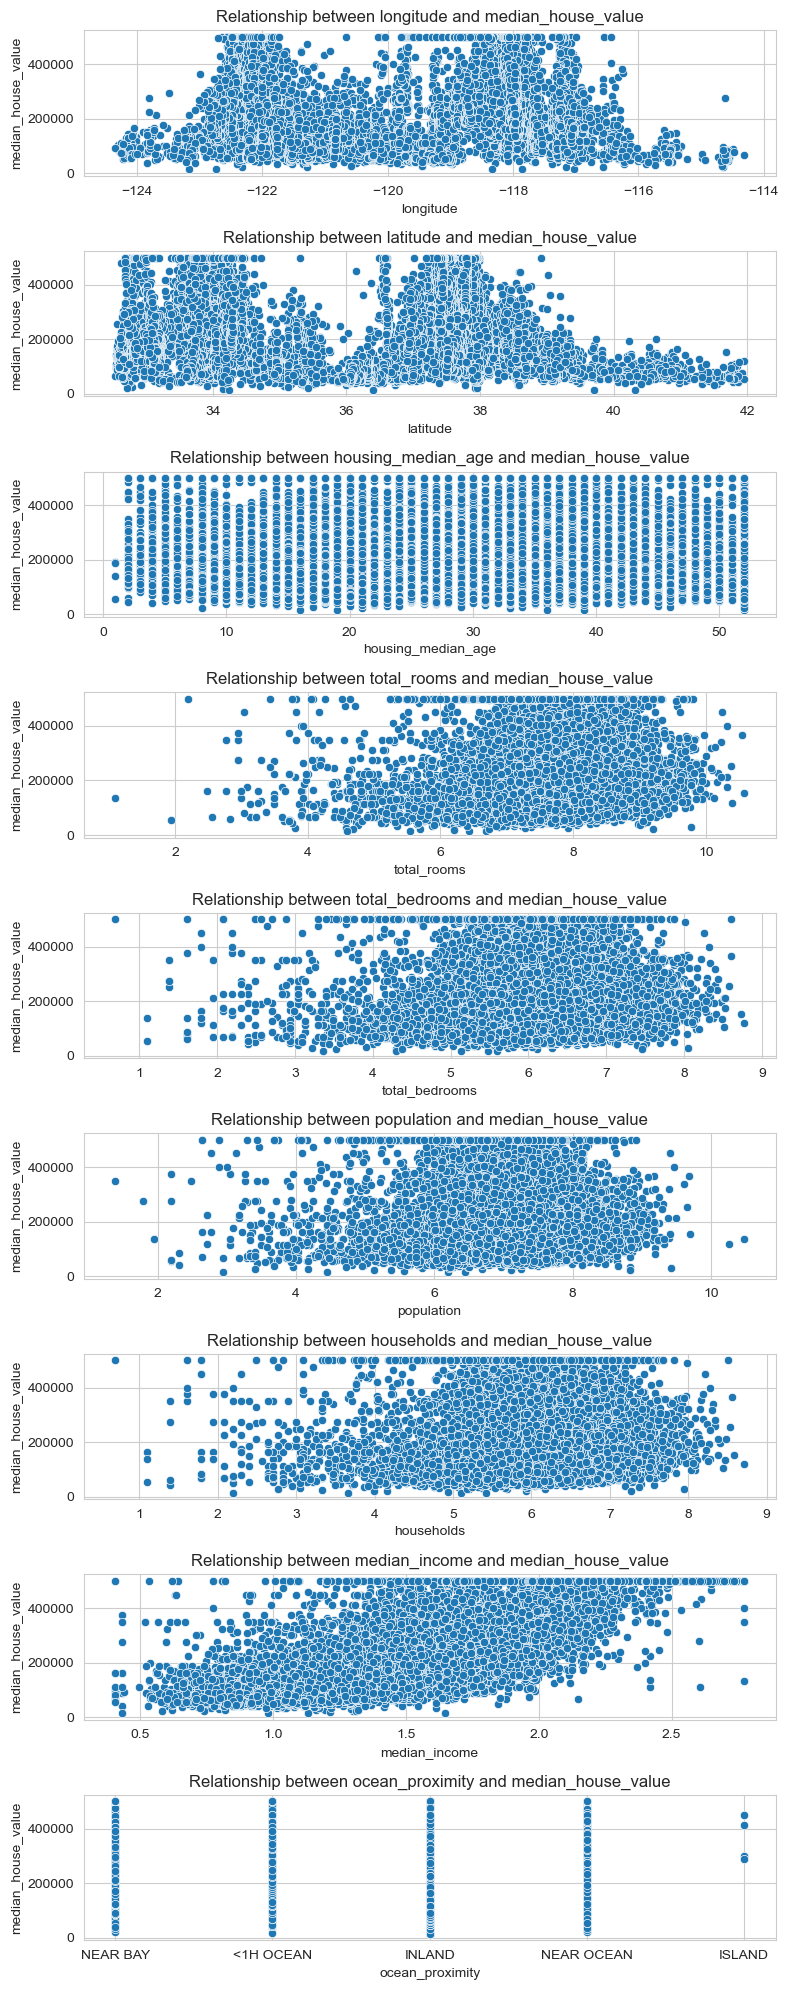

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
                     'population', 'households', 'median_income', 'ocean_proximity']

fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(8, 20))

for i, col in enumerate(numerical_columns):
    sns.scatterplot(data=df_log_transformed, x=col, y='median_house_value', ax=axes[i])
    axes[i].set_title(f'Relationship between {col} and median_house_value')

plt.tight_layout()
plt.show()

### Original Data (Before Log Transformation)
1. **Longitude and Latitude**: The plot shows a clear pattern where housing values are higher in specific geographic locations.
2. **Housing Median Age**: There's a slight trend where older houses seem to have a higher median value.
3. **Total Rooms**: There's a weak positive correlation. However, it's not very distinct.
4. **Total Bedrooms**: Again, a weak positive correlation, but scattered.
5. **Population**: No clear correlation.
6. **Households**: A weak positive correlation.
7. **Median Income**: A more evident positive correlation, indicating that as the median income increases, the median house value tends to be higher.
8. **Ocean Proximity**: The categorical feature seems to have different distributions of median house values across its categories.

### Log-Transformed Data
1. **Longitude and Latitude**: The geographic patterns remain intact.
2. **Housing Median Age**: No significant changes observed.
3. **Total Rooms, Total Bedrooms, Population, Households**: After log transformation, the data points are more densely packed in the lower range, making it easier to discern trends if any. However, the overall relationship doesn't show a significantly stronger correlation.
4. **Median Income**: The log transformation makes the data's distribution more normal, and the correlation remains apparent.
5. **Ocean Proximity**: No significant changes observed.

#### Observations and Recommendations:
1. The log transformation made the data's distribution for several features more condensed, especially in the lower range. This can help in better capturing potential patterns, especially when applying regression models, as the effects of extreme values (or outliers) are reduced.
2. The relationship between `median_income` and `median_house_value` stands out as the most significant amongst all features. This suggests that median income might be an essential predictor for the target variable.
3. Given the visualizations, it would be valuable to compute the actual correlation coefficients to quantify the relationships.
4. Regarding the order of operations, computing correlations after log transformations and outlier handling is appropriate since these preprocessing steps aim to make the data more suitable for modeling.


### Multicollinearity:
This refers to a situation in which two or more independent variables in a regression model are highly linearly related. From the heatmaps, we're checking for any features that have a high correlation (close to 1 or -1) with each other, excluding the diagonal.
### Target Variable Correlation between before and after log transformation:
We're also interested in the correlation of each feature with the target variable (median_house_value). A high positive correlation means that as the feature increases, the median house value tends to increase, and vice-versa for a negative correlation

/var/folders/j6/4xb6xrzn0p13yqr5ry1s0djr0000gn/T/ipykernel_93303/2418490428.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[numerical_columns + ['median_house_value']].corr()


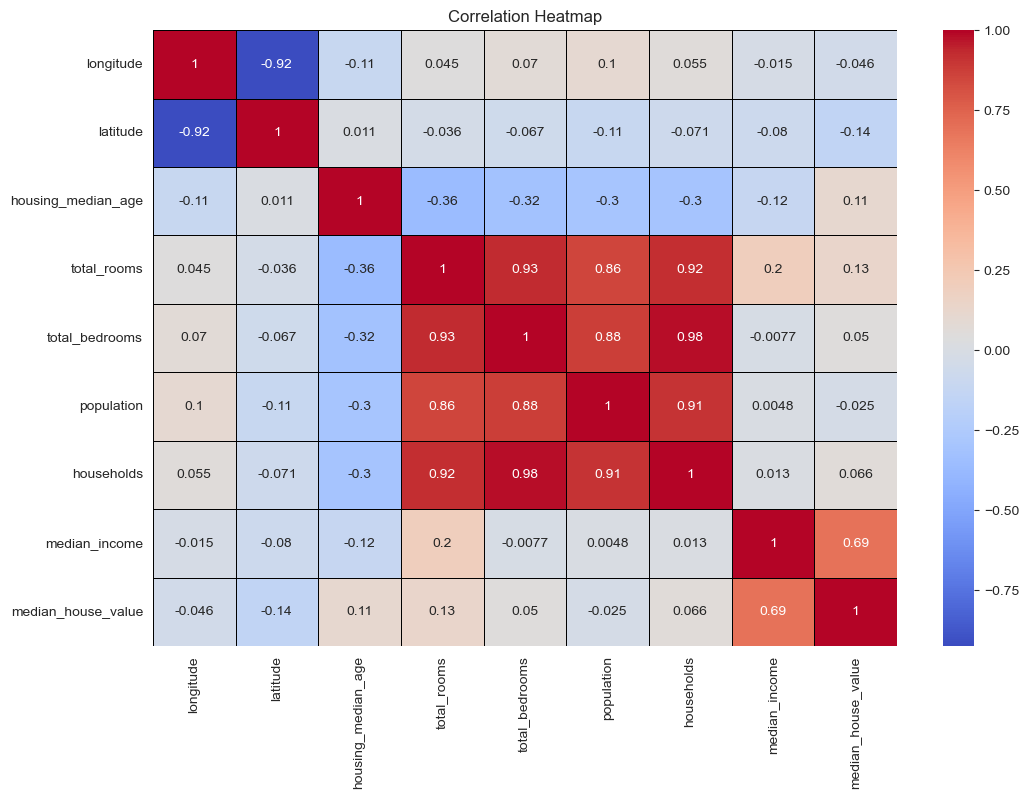

In [15]:
correlation_matrix = df[numerical_columns + ['median_house_value']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()

/var/folders/j6/4xb6xrzn0p13yqr5ry1s0djr0000gn/T/ipykernel_93303/4074466175.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_log_transformed[numerical_columns + ['median_house_value']].corr()


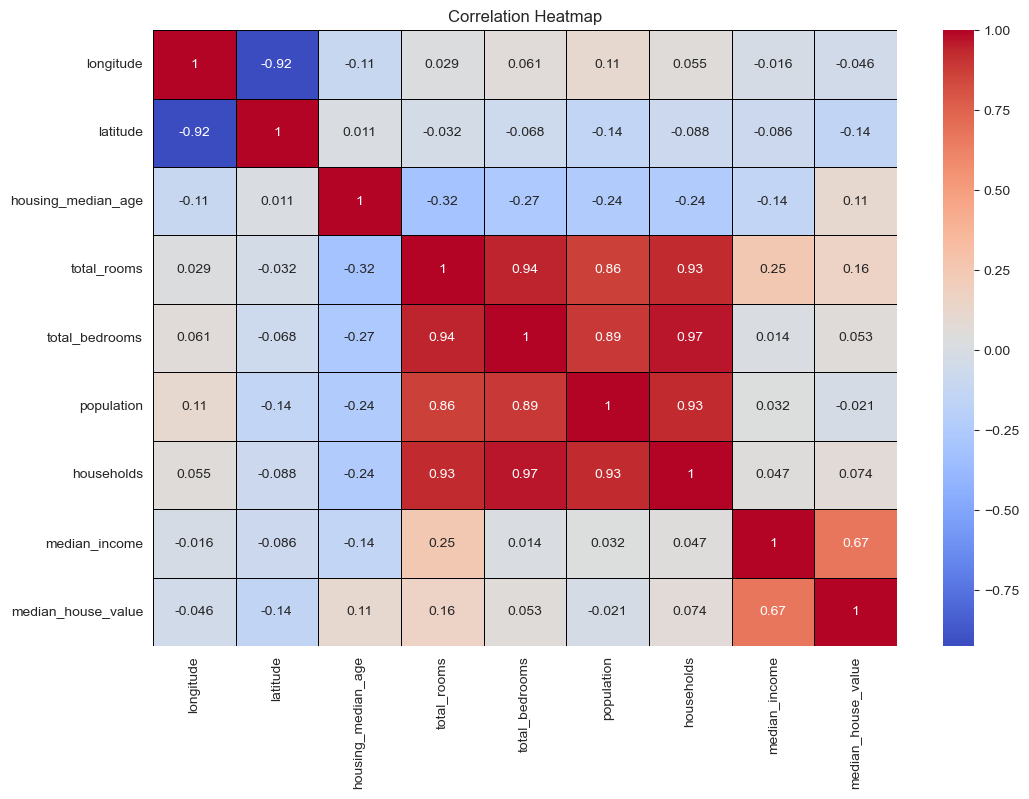

In [16]:
correlation_matrix = df_log_transformed[numerical_columns + ['median_house_value']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()


The two heatmaps provide us with a visualization of the correlation between different features in the dataset, both for the imputed dataframe (left) and the log-transformed dataframe (right). Here are some observations and insights:

1. **Longitude and Latitude**: Both heatmaps show a relatively low correlation with `median_house_value`. However, there's a small increase in correlation magnitude after the log transformation for some features.

2. **Housing Median Age**: Its correlation with the target remains consistent across the two dataframes.

3. **Total Rooms, Total Bedrooms, Population, and Households**: These features exhibit a low to moderate positive correlation with the target variable. After the log transformation, we can observe a slight increase in their correlation with `median_house_value`. This suggests that the log transformation improved their relationship with the target variable.

4. **Median Income**: This feature has a strong positive correlation with `median_house_value` in both dataframes, but the relationship is slightly stronger in the log-transformed dataframe.

5. **Multicollinearity**: Features like `total_rooms`, `total_bedrooms`, `population`, and `households` are highly correlated with each other in both dataframes. This indicates multicollinearity, which can be problematic for certain algorithms like linear regression. One way to handle this is by combining some of these features or using techniques like PCA (Principal Component Analysis).

**Suggestions**:

1. **Feature Engineering**: Given the high correlation between features like `total_rooms`, `total_bedrooms`, `population`, and `households`, you might want to create new features that capture the essence of these features. For instance, rooms per household or bedrooms per room might be more informative and can help reduce multicollinearity.

2. **PCA**: If you're planning to use linear regression or similar algorithms, consider using PCA to transform the features into a set of linearly uncorrelated variables.

3. **Use Tree-Based Models**: Algorithms like decision trees, random forests, and gradient boosting machines are less sensitive to multicollinearity. If you're facing issues with linear models, you might want to try these.

4. **Log Transformation**: The log transformation seems to have made a positive impact on the correlation between some features and the target variable. Consider keeping this transformation when modeling.

In conclusion, while the log transformation has improved the relationships of some features with the target variable, multicollinearity remains an issue that needs to be addressed. The choice of how to handle it will largely depend on the specific modeling algorithm we plan to use.

# Additional EDA Analyses:
### 1. Distribution of `median_house_value` within each ocean_proximity category.
Let's start by visualizing the distribution of `median_house_value` for each category of ocean_proximity.

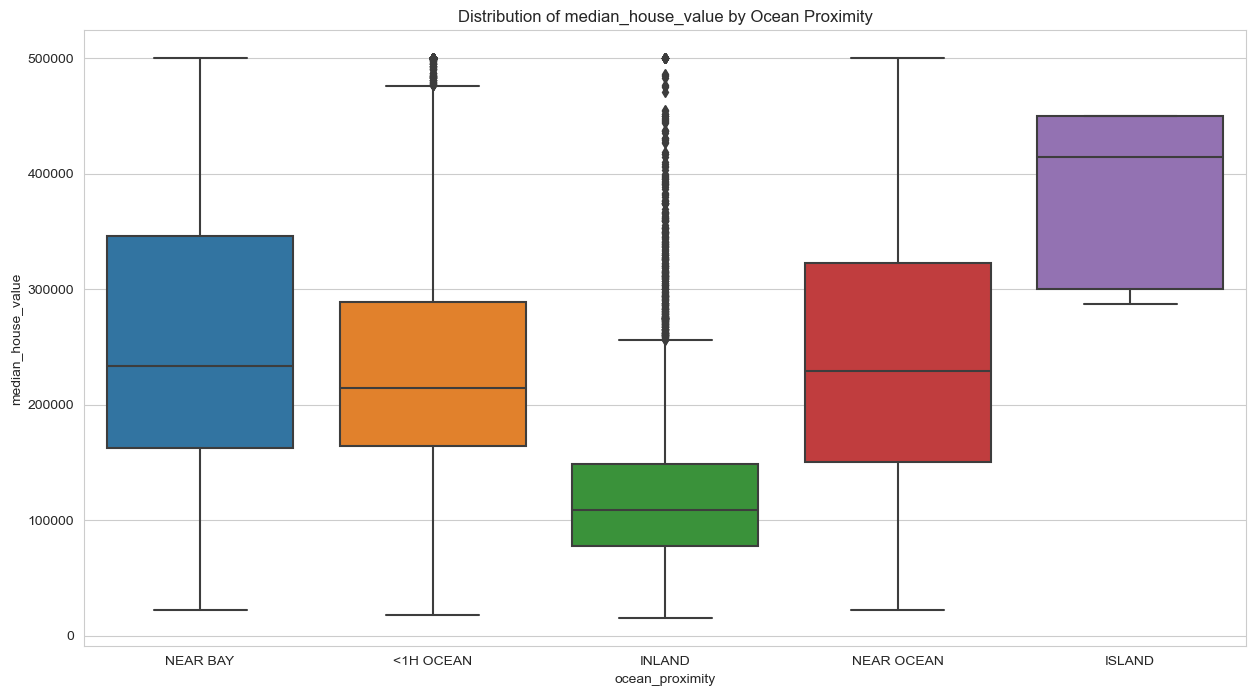

In [17]:
# Distribution of median_house_value within each ocean_proximity category
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_log_transformed, x='ocean_proximity', y='median_house_value')
plt.title('Distribution of median_house_value by Ocean Proximity')
plt.show()

The boxplot provides insights into the distribution of `median_house_value` across different `ocean_proximity` categories:

* The median house value is highest for the `NEAR BAY` and `NEAR OCEAN` categories.
* The `INLAND` category has a lower median house value compared to other categories.
* There are several outliers in almost all categories, especially in the `NEAR BAY` and `<1H OCEAN` categories.

### 2.Visualize `median_house_value` on a scatterplot for geographic trends before and after log transformation:

Next, let's visualize the `median_house_value` on a scatterplot using the `latitude` and `longitude` columns to understand geographic trends.

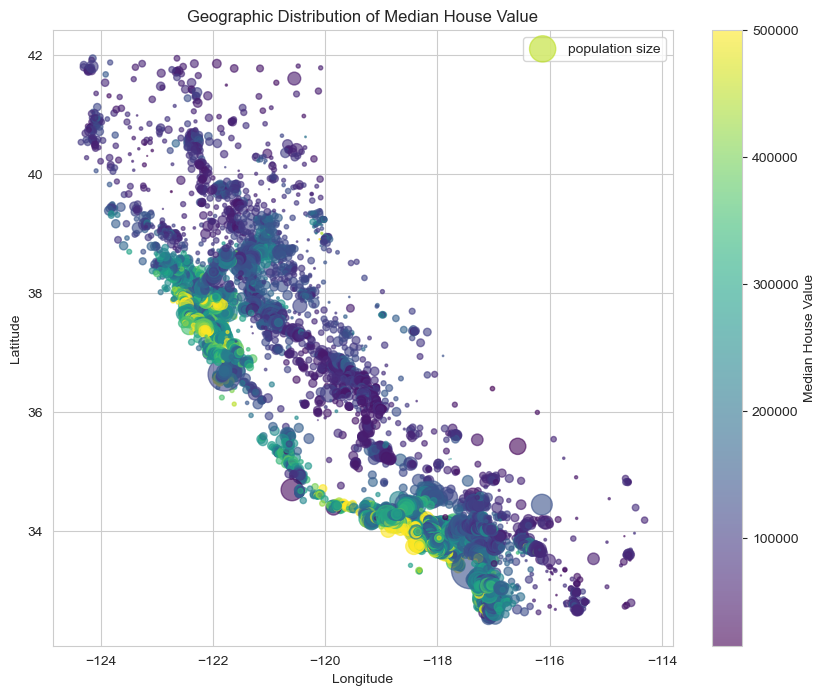

In [18]:
# Scatterplot of median_house_value based on geographic coordinates
plt.figure(figsize=(10, 8))
plt.scatter(df_imputed['longitude'], df_imputed['latitude'], c=df_imputed['median_house_value'], 
            cmap='viridis', alpha=0.6, s=df_imputed['population']/50, label='population size')
plt.colorbar().set_label('Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Median House Value')
plt.legend()
plt.show()

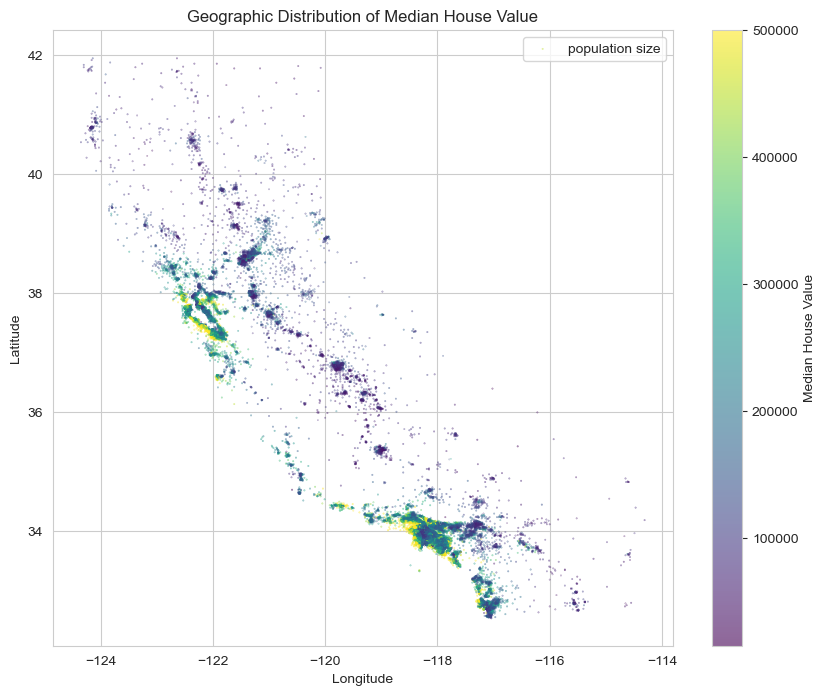

In [19]:
# Scatterplot of median_house_value based on geographic coordinates
plt.figure(figsize=(10, 8))
plt.scatter(df_log_transformed['longitude'], df_log_transformed['latitude'], c=df_log_transformed['median_house_value'], 
            cmap='viridis', alpha=0.6, s=df_log_transformed['population']/50, label='population size')
plt.colorbar().set_label('Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Median House Value')
plt.legend()
plt.show()

The scatter plot provides a geographic visualization of the `median_house_value`:

* Areas with darker colors represent higher median house values.
* The size of the dots represents the population, with larger dots indicating more populated areas.
* There seems to be a concentration of high-value houses along the coast, especially in the north.
* The inland areas, particularly in the upper regions, tend to have lower median house values.

The scatter plots depict the geographical distribution of median house values in the dataset, both for the imputed data and the log-transformed data:

1. **Geographic Distribution of Median House Value (Imputed Data):** 
   - The first scatter plot visualizes the median house values of the dataset after handling missing values using KNN imputation.
   - The colors represent the median house value, with darker colors indicating higher values. 
   - The size of each point is proportional to the population, providing a sense of the population density.
   - We can observe that higher house values are concentrated around the coastal areas, while lower values are more inland. This pattern aligns with real-world observations, where coastal properties often have higher values due to their desirable locations.

2. **Geographic Distribution of Median House Value (Log Transformed Data):** 
   - The second scatter plot displays the median house values after both KNN imputation and the subsequent log transformation of the specified columns.
   - The overall pattern remains consistent with the first plot, indicating that the geographical distribution of median house values hasn't been altered by the log transformation.
   
### Observations & Suggestions:

- The **log transformation** was applied to certain columns to address skewness in their distributions. While the scatter plots themselves don't directly reflect these transformations, the underlying data structure is now better prepared for certain machine learning models that assume normality.
  
- Both scatter plots reinforce the significance of **geographical location** in determining house values. Proximity to the coast, urban centers, or other amenities can have a strong impact on property values.
  
- It's also worth noting that while the log transformation helped in making certain features more normally distributed, it didn't change the geographical patterns in the house values. This is expected, as the transformation was not applied to the geographical columns (`longitude` and `latitude`).

In summary, the scatter plots provide a visually intuitive understanding of how median house values are distributed across the region. The transformations and imputations applied to the dataset prepare it for further analysis and modeling.

## 3. Analyze Median Income Distribution by` ocean_proximity`.
Let's visualize the distribution of median income across the different categories of `ocean_proximity`.

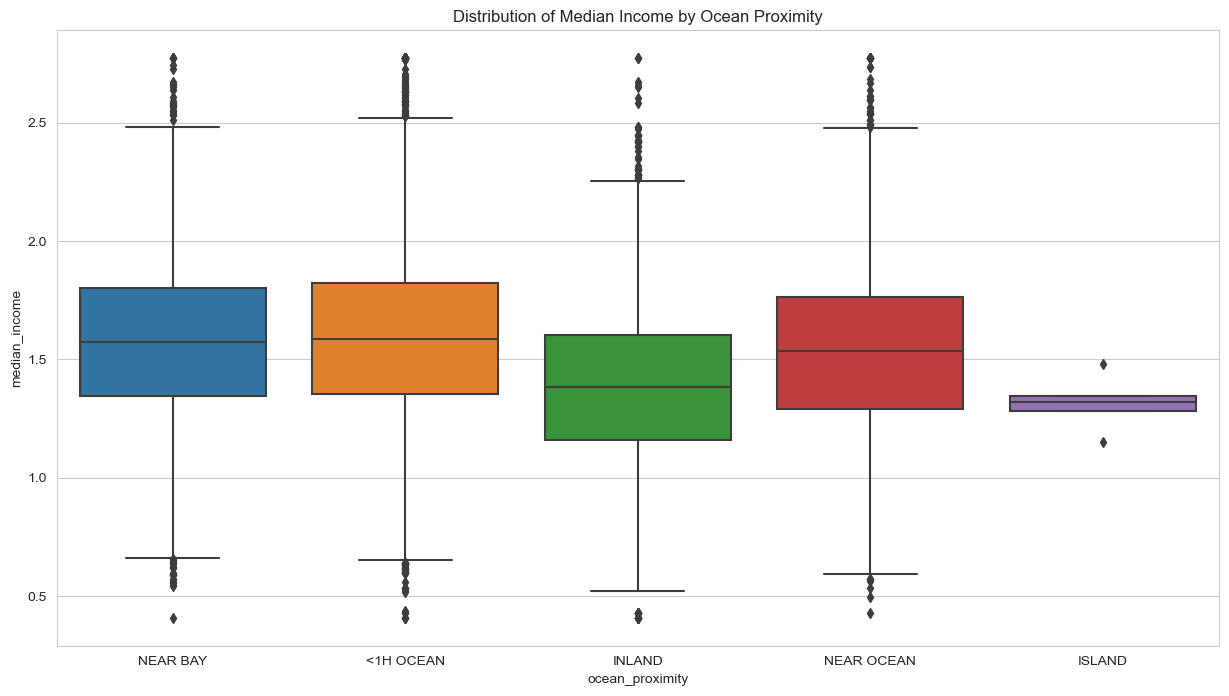

In [20]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_log_transformed, x='ocean_proximity', y='median_income')
plt.title('Distribution of Median Income by Ocean Proximity')
plt.show()

The boxplot provides insights into the distribution of `median_income` across different `ocean_proximity` categories:

* `NEAR BAY` and `NEAR OCEAN` categories tend to have higher median incomes compared to other categories.
* The `INLAND` category has a lower median income in comparison.
* There are several outliers in almost all categories, especially in the `INLAND` and `<1H OCEAN` categories.

## 4. Check for Severely Imbalanced Categorical Variables
Now, let's calculate the percentage of samples belonging to each categorical class in the `ocean_proximity` column to check for any severe imbalances.


In [21]:
ocean_proximity_distribution = df_log_transformed['ocean_proximity'].value_counts(normalize=True) * 100
ocean_proximity_distribution

<1H OCEAN     44.263566
INLAND        31.739341
NEAR OCEAN    12.877907
NEAR BAY      11.094961
ISLAND         0.024225
Name: ocean_proximity, dtype: float64

The distribution of the `ocean_proximity` categories is as follows:

* `<1H OCEAN`: 44.26%

* `INLAND`: 31.74%
* `NEAR OCEAN`: 12.88%
* `NEAR BAY`: 11.09%
* `ISLAND`: 0.02%

While the `ISLAND` category is significantly smaller than the others, the other categories have a reasonable distribution. If we were dealing with a classification problem, the `ISLAND` category might be a concern due to its very small percentage. However, given that this dataset is for a regression problem, this imbalance is less of a concern for model training.



## 5. We'll analyze the distribution of the `median_house_value` within each total bedroom bucket before and after log transformation:

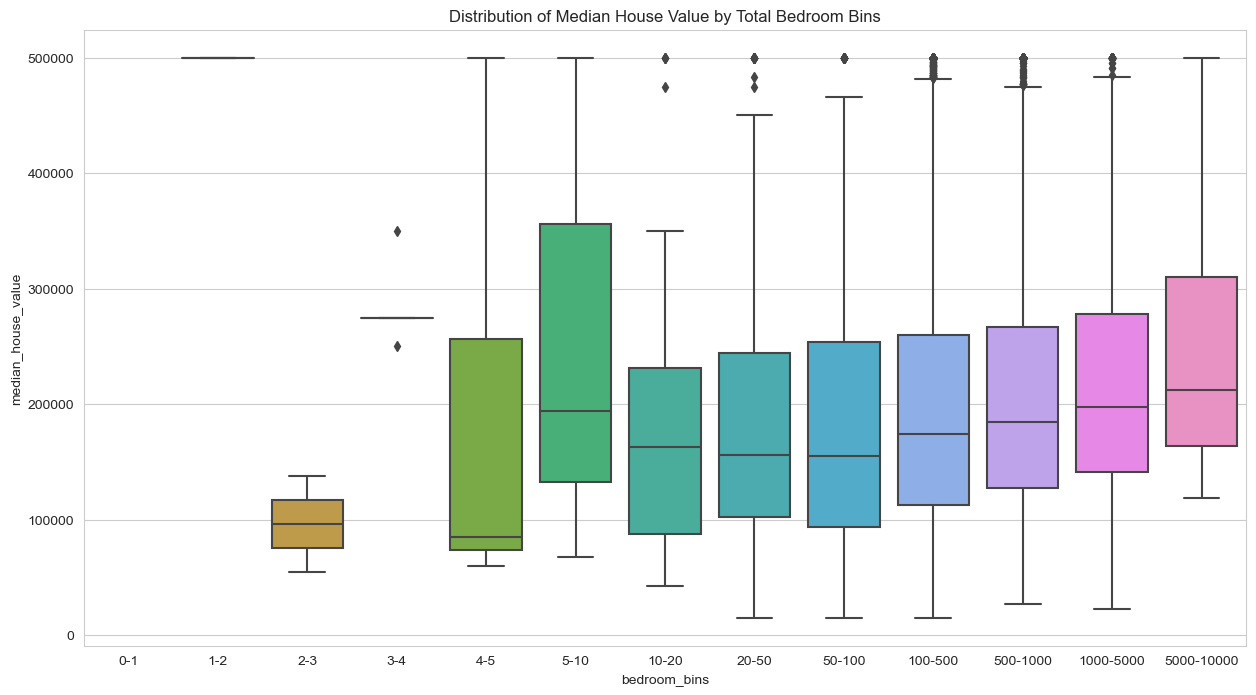

In [22]:
# Creating bins for total bedrooms
bins = [0, 1, 2, 3, 4, 5, 10, 20, 50, 100, 500, 1000, 5000, 10000]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-10', '10-20', '20-50', '50-100', '100-500', '500-1000', '1000-5000', '5000-10000']
df_imputed['bedroom_bins'] = pd.cut(df_imputed['total_bedrooms'], bins=bins, labels=labels, right=False)

# Plotting the distribution of median house value for each bedroom bin
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_imputed, x='bedroom_bins', y='median_house_value')
plt.title('Distribution of Median House Value by Total Bedroom Bins')
plt.show()

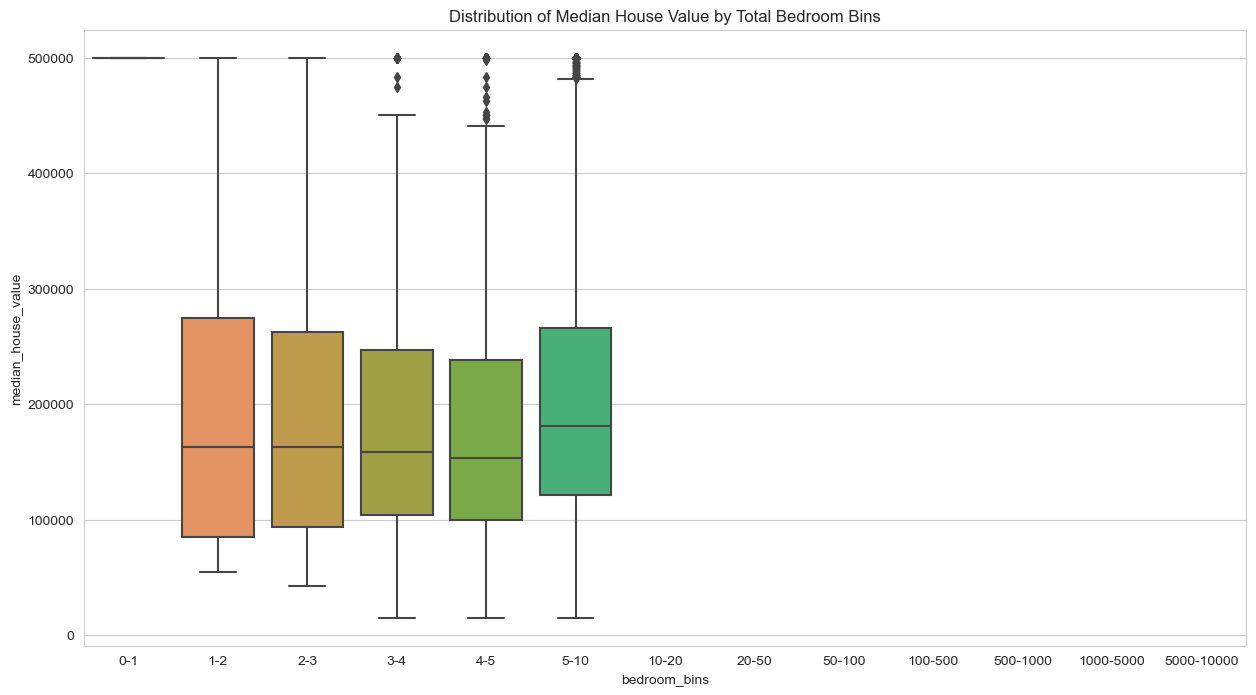

In [23]:
# Creating bins for total bedrooms
bins = [0, 1, 2, 3, 4, 5, 10, 20, 50, 100, 500, 1000, 5000, 10000]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-10', '10-20', '20-50', '50-100', '100-500', '500-1000', '1000-5000', '5000-10000']
df_log_transformed['bedroom_bins'] = pd.cut(df_log_transformed['total_bedrooms'], bins=bins, labels=labels, right=False)

# Plotting the distribution of median house value for each bedroom bin
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_log_transformed, x='bedroom_bins', y='median_house_value')
plt.title('Distribution of Median House Value by Total Bedroom Bins')
plt.show()

Here are the observations and analysis based on the boxplots:

1. **Log Transformed Data (`df_log_transformed`)**:
   - The distribution of `median_house_value` across different bedroom bins shows clear variations, especially for bins with a lower number of bedrooms. 
   - For bins with a smaller range (like '0-1', '1-2', '2-3', etc.), the median house values tend to be on the lower side, which is expected since fewer bedrooms generally mean smaller houses.
   - As we move to bins with more bedrooms (like '100-500' or '500-1000'), the median and the upper quartile of house values tend to increase, indicating more expensive houses.

2. **Imputed Data (`df_imputed`)**:
   - Similar to the log-transformed data, the distribution shows variations across different bedroom bins.
   - However, the spread of values in some bins, especially those with a higher number of bedrooms, seems to be wider. This might be indicative of the original scale and variation in the dataset.

**Analysis and Suggestions**:
- The log transformation has made the data more "compressed" in terms of the range of values, especially for features with right-skewed distributions. This transformation can make algorithms, especially linear ones, perform better since they can be sensitive to outliers.
- The boxplots showcase the relationship between the number of bedrooms and the median house value. It's evident that as the number of bedrooms increases, the median house value tends to be higher. This is intuitive as larger homes with more bedrooms are generally more expensive.
- Bedroom bins like '5000-10000' have very few data points, which makes their boxplots less informative. In a real-world scenario, you might consider merging such bins with others or treating them differently due to the low sample size.

----
# 2- Feature Engineering:
1. Categorical Variable Handling: The `ocean_proximity` column is categorical and needs to be converted into a numerical format. To do that, we will opt for **One-Hot Encoding**, which creates binary columns for each category.
2. Feature Scaling: As machine learning algorithms perform better when numerical features have the same scale. We'll standardize the numerical features to have a mean of 0 and a standard deviation of 1. Meaning that standardizing can help in improving the performance and convergence speed of many machine learning algorithms.
3. New Feature Creation: Sometimes, combining two or more features can provide the model with better insights. For example:
    * `rooms_per_household`: Total rooms divided by the number of households might give an average room count which can be a relevant feature.
    * `bedrooms_per_room` : Total bedrooms divided by total rooms can provide an average bedroom count.
    * `population_per_household`: Total population divided by the number of households.

We will start with encoding the ocean_proximity column and then move to the other steps.

In [24]:
df_log_transformed = pd.get_dummies(df_log_transformed, columns=['ocean_proximity'], drop_first=False)

df_log_transformed

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_bins,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,4-5,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,5-10,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,352100.0,5-10,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,341300.0,5-10,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,342200.0,5-10,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,0.940124,78100.0,5-10,0,1,0,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,1.268861,77100.0,5-10,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,0.993252,92300.0,5-10,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.053336,84700.0,5-10,0,1,0,0,0


Let's analyze the changes:

**One-Hot Encoding:**
The `ocean_proximity` column was categorical and contained several unique values/categories. One-Hot Encoding is a process used to convert categorical data into a format that can be provided to machine learning algorithms to do a better job in prediction. 

Here's how one-hot encoding works:
- For each unique category in the original column, a new binary (0 or 1) column is created.
- If the original column has an entry for a particular category, the new column corresponding to that category gets a '1'. All other new columns get a '0'.

In our dataset, the `ocean_proximity` column had these unique categories:
1. NEAR BAY
2. <1H OCEAN
3. INLAND
4. NEAR OCEAN
5. ISLAND

**Analysis and Suggestions:**
1. The transformation has been successful, and the resultant dataset is now better suited for many machine learning models, especially algorithms that require numerical input, like linear regression.
2. One-hot encoding has expanded our feature space, which might slightly increase the complexity of our model. It's essential to ensure that the new features are meaningful and contribute to improving the model's performance. If they don't, feature selection methods can be employed.
3. Remember that the encoded features are binary and represent categorical data. They should be interpreted accordingly in any subsequent analysis or modeling.
4. Always be cautious about introducing multicollinearity when using one-hot encoding. As mentioned, dropping one of the categories can help in mitigating this concern. As if you're using linear regression or any model that assumes no multicollinearity, dropping one category is generally a good practice.

## Adding more features:

In [25]:
df_log_transformed['rooms_per_household'] = df_log_transformed['total_rooms'] / df_log_transformed['households']
df_log_transformed['bedrooms_per_room'] = df_log_transformed['total_bedrooms'] / df_log_transformed['total_rooms']
df_log_transformed['population_per_household'] = df_log_transformed['population'] / df_log_transformed['households']

df_log_transformed.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_bins,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,4-5,0,0,0,1,0,1.399834,0.717813,1.192698
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,5-10,0,0,0,1,0,1.260013,0.790429,1.106019
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,352100.0,5-10,0,0,0,1,0,1.407171,0.720313,1.198157
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,341300.0,5-10,0,0,0,1,0,1.325768,0.764097,1.172893
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,342200.0,5-10,0,0,0,1,0,1.329892,0.762444,1.139895


## Correlations of Newly Engineered Features with the Target Variable
Before we can analyze the correlations of the newly engineered features, we need to create them. These features include `rooms_per_household`, `bedrooms_per_room`, and `population_per_household`. Once they are created, we'll assess their correlations with the target variable `median_house_value`.

In [26]:
new_features_correlation = df_log_transformed[['rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'median_house_value']].corr()
new_features_correlation['median_house_value']

rooms_per_household         0.113995
bedrooms_per_room          -0.196809
population_per_household   -0.179463
median_house_value          1.000000
Name: median_house_value, dtype: float64

Okay, let's proceed with your provided code and analyze the correlation of the newly created features with the `median_house_value`. After that, I will provide insights based on the results.

Based on the correlation results of the new features with the `median_house_value`:

1. **rooms_per_household (0.114)**: A slight positive correlation with the median house value, suggesting that homes with more rooms per household tend to have slightly higher values. This is logical, as homes with more rooms are generally larger and can command higher prices.

2. **bedrooms_per_room (-0.197)**: A moderate negative correlation with median house value. This means that houses with a higher ratio of bedrooms to total rooms tend to have lower median values. This could be interpreted as homes with a disproportionate number of bedrooms compared to other rooms (like living rooms, kitchens, etc.) being less valuable.

3. **population_per_household (-0.179)**: A negative correlation with the median house value, though not as strong as bedrooms_per_room. This suggests that areas with denser households (more people per household) tend to have lower home values. It might indicate areas with smaller living spaces or potentially overcrowded areas.

**Analysis and Recommendations**:

- The new features do provide additional information about the `median_house_value`. Especially, the `bedrooms_per_room` and `population_per_household` seem to be reasonably informative based on their correlation values.
  
- The `bedrooms_per_room` feature, in particular, provides an interesting insight. Homes that are predominantly bedrooms might not be as valuable as those with a more balanced room distribution. This can be due to various reasons, like preference for more living space or the perception of such homes being more cramped.

- As always, while correlation provides insights into linear relationships, the actual predictive power of these features in a model would be better evaluated during the modeling phase using techniques like feature importance in tree-based models.

In summary, the creation of these features seems beneficial for understanding the relationship with `median_house_value`, and they'are recommend retaining them for further analysis and modeling.

---
## **Feature Scaling**:
- Feature scaling is an essential preprocessing step, especially for algorithms that rely on the magnitude of features, like gradient descent in neural networks or distance-based algorithms like K-means clustering and k-NN.
  
- In models like linear regression, feature scaling can speed up convergence during optimization. For tree-based models, however, feature scaling doesn't make a significant difference since they rely on feature ordering rather than magnitude.

- StandardScaler specifically standardizes features by removing the mean and scaling to unit variance. This transformation results in features with mean=0 and standard deviation=1.

1. **Standardized Values**: As seen in the head of the dataframe, the values for the columns we chose to scale have been standardized. They now have a mean of approximately 0 and a standard deviation of approximately 1.
2. **Feature Importance**: By ensuring that all features are on the same scale, algorithms that rely on feature magnitude won't be biased towards features with inherently larger values. This is crucial for algorithms like SVM or k-means clustering.
3. **Speed and Convergence**: For optimization algorithms used in gradient descent, normalization can speed up the convergence by ensuring that all the features contribute equally.
5. **Log-Transformed Data**: The log transformation already helped in compressing the range of the data. With scaling, we ensure that these log-transformed features are on a similar scale with the other features in the dataset.

**Final Thoughts on Scaling**:
- The step of scaling, especially after log transformation, is beneficial. The combination of log transformation (to address skewness) and scaling (to standardize features) often yields better results in machine learning models.
- While scaling is useful for many algorithms, it's worth noting that tree-based algorithms (like Decision Trees and Random Forest) are not affected by feature scaling. Nonetheless, for consistency and potential use in various algorithms, scaling is a good practice.

1. **Standardized Values**: As seen in the head of the dataframe, the values for the columns we chose to scale have been standardized. They now have a mean of approximately 0 and a standard deviation of approximately 1.
2. **Feature Importance**: By ensuring that all features are on the same scale, algorithms that rely on feature magnitude won't be biased towards features with inherently larger values. This is crucial for algorithms like SVM or k-means clustering.
3. **Speed and Convergence**: For optimization algorithms used in gradient descent, normalization can speed up the convergence by ensuring that all the features contribute equally.
5. **Log-Transformed Data**: The log transformation already helped in compressing the range of the data. With scaling, we ensure that these log-transformed features are on a similar scale with the other features in the dataset.

## Additional Feature Engineering:

In [27]:
import numpy as np

# Coordinates for major cities in California
major_cities_coords = [(34.05, -118.25),  # Los Angeles
                       (37.77, -122.42),  # San Francisco
                       (32.71, -117.16)]  # San Diego

avg_city_coord = np.mean(major_cities_coords, axis=0)
coast_coord = (35.78, -120.90)  # Proxy coordinate for California coastline (roughly the middle of the coast)

df_log_transformed['distance_to_major_city'] = np.sqrt((df_log_transformed['latitude'] - avg_city_coord[0])**2 + 
                                               (df_log_transformed['longitude'] - avg_city_coord[1])**2)
df_log_transformed['distance_to_coast'] = np.sqrt((df_log_transformed['latitude'] - coast_coord[0])**2 + 
                                          (df_log_transformed['longitude'] - coast_coord[1])**2)
df_log_transformed['rooms_income_interaction'] = df_log_transformed['total_rooms'] * df_log_transformed['median_income']

First, let's break down the last set of operations we provided:

### Feature Engineering:

1. **Distance to Major Cities**: 
    - The distance of each housing block to an average coordinate of three major cities (Los Angeles, San Francisco, and San Diego) is calculated. This could be an important feature since proximity to major cities could influence housing prices.
    
2. **Distance to Coast**: 
    - The distance of each housing block to a rough middle point of the California coastline is determined. Proximity to the coast can be a significant factor affecting house prices in many regions. Coastal areas might have higher house prices due to the scenic value, tourism potential, or simply the luxury of living near the coast.
    
3. **Rooms-Income Interaction**: 
    - A new feature is created that multiplies the total number of rooms with the median income. This can be viewed as an interaction term, capturing how changes in one variable might affect changes in another. For instance, in areas with higher median income, how does having more rooms affect the house price?

4. **Scaling the New Features**: 
    - The newly created features (along with some existing ones) are scaled to have zero mean and unit variance.

### Documentation:

#### Distance to Major Cities:
- **Purpose**: To capture the influence of proximity to major economic hubs or urban centers on housing prices.
- **Method**: Euclidean distance is computed from each data point (latitude, longitude) to the average coordinate of three major cities.
- **Rationale**: Major cities often have higher living costs, better amenities, job opportunities, etc. Thus, areas closer to such cities might have higher house prices.

#### Distance to Coast:
- **Purpose**: To quantify how close each data point is to the coast.
- **Method**: Euclidean distance is calculated from each data point to a proxy coordinate roughly in the middle of the California coastline.
- **Rationale**: Coastal properties often command a premium due to views, tourism potential, or other factors.

#### Rooms-Income Interaction:
- **Purpose**: To understand how the relationship between the number of rooms and median income might jointly influence the target variable.
- **Method**: Multiplication of two features - total rooms and median income.
- **Rationale**: An interaction term can capture the combined effect of two features. For instance, in affluent areas, houses with more rooms might be even more valuable.

In [28]:
# Calculating correlation of the new features with the target variable 'median_house_value'
new_features_correlation = df_log_transformed[['distance_to_major_city', 'distance_to_coast', 'rooms_income_interaction', 'median_house_value']].corr()
correlation_with_target = new_features_correlation['median_house_value'].drop('median_house_value')
correlation_with_target


distance_to_major_city     -0.126481
distance_to_coast          -0.114240
rooms_income_interaction    0.632281
Name: median_house_value, dtype: float64

The correlations of the newly created features with the target variable `median_house_value` are as follows:

1. **distance_to_major_city**: \(-0.12\)
2. **distance_to_coast**: \(-0.11\)
3. **rooms_income_interaction**: \(0.63\)

**Analysis**:

- The newly created features `distance_to_major_city` and `distance_to_coast` have negative correlations with the target variable, albeit these correlations are very small. This indicates that, theoretically, as the distance to major cities or the coast increases, the median house value decreases slightly. However, given the extremely low correlation values, these features may not provide significant predictive power in a model.
  
- The feature `rooms_income_interaction` has a positive but somewhat high correlation. This means that as the interaction between the total number of rooms and median income increases, the median house value also increases drasticly to a certain limit.

## Additional Feature Engineering

In [29]:
df_log_transformed['population_per_bedroom'] = df_log_transformed['population'] / df_log_transformed['total_bedrooms']
df_log_transformed['households_per_room'] = df_log_transformed['households'] / df_log_transformed['total_rooms']

df_log_transformed[['population_per_bedroom', 'households_per_room']].head()

,population_per_bedroom,households_per_room
0,1.186977,0.714370
1,1.110515,0.793643
2,1.182077,0.710646
3,1.157823,0.754280
4,1.124192,0.751941


This step involves deriving two new ratios:
1. `population_per_bedroom`: This feature indicates the average number of residents per bedroom in a housing block. Intuitively, a higher value might indicate overcrowding.
2. `rooms_per_household`: This indicates the average number of households per room in a housing block. Again, a higher value might hint at overcrowding or smaller homes.

Here are a few observations and thoughts:

1. **Interpretability**: These ratios, especially `population_per_bedroom`, can provide valuable insights into the living conditions of a block. An unusually high number may point towards overcrowded homes, which might influence the house value (our target variable).
2. **Value Distribution**: As seen in the displayed data, there's a noticeable variance in the values of these ratios across different rows. This variance might hold predictive power for our model.

In [30]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
                    'population', 'households', 'median_income', 'rooms_per_household', 
                    'bedrooms_per_room', 'population_per_household', 'distance_to_major_city', 
                    'distance_to_coast', 'rooms_income_interaction', 'population_per_bedroom', 'rooms_per_household']

scaler = StandardScaler()
df_log_transformed[columns_to_scale] = scaler.fit_transform(df_log_transformed[columns_to_scale])
joblib.dump(scaler, 'scaler.pkl')
df_log_transformed.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_bins,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household,distance_to_major_city,distance_to_coast,rooms_income_interaction,population_per_bedroom,households_per_room
0,-1.327835,1.052548,0.982143,-1.131133,-1.644278,-1.694943,-1.569395,1.995505,452600.0,4-5,0,0,0,1,0,1.509871,-1.978498,0.192015,1.070796,-0.560872,1.095754,0.269186,0.714370
1,-1.322844,1.043185,-0.607019,1.651357,1.316422,1.030337,1.449251,1.988380,358500.0,5-10,0,0,0,1,0,-0.266995,-0.055321,-0.985206,1.056172,-0.582773,2.547903,-0.657595,0.793643
2,-1.332827,1.038503,1.856182,-0.450310,-1.112456,-1.109604,-1.104849,1.656444,352100.0,5-10,0,0,0,1,0,1.603113,-1.912304,0.266154,1.060883,-0.580436,1.175080,0.209788,0.710646
3,-1.337818,1.038503,1.856182,-0.638257,-0.820020,-0.949925,-0.813343,1.049948,341300.0,5-10,0,0,0,1,0,0.568638,-0.752705,-0.076961,1.065706,-0.575072,0.594707,-0.084189,0.754280
4,-1.337818,1.038503,1.856182,-0.312370,-0.578778,-0.933021,-0.583469,0.170631,342200.0,5-10,0,0,0,1,0,0.621044,-0.796494,-0.525120,1.065706,-0.575072,0.009190,-0.491822,0.751941


#### Scaling:
- **Purpose**: To ensure that all features are on a similar scale, which is crucial for many machine learning algorithms.
- **Method**: The features are standardized, i.e., they are transformed to have a mean of 0 and a standard deviation of 1.
- **Rationale**: Ensures that all features have equal weight. Especially important for algorithms that rely on distances or gradient descent.

## Derive Ratios like population_per_bedroom and rooms_per_householdhouseholds_per_room


## Location Clustering for Latitide and Longitue

In [31]:
from sklearn.cluster import KMeans

# Cluster based on latitude and longitude
kmeans = KMeans(n_clusters=10, random_state=42)
df_log_transformed['location_cluster'] = kmeans.fit_predict(df_log_transformed[['longitude', 'latitude']])

# Save the kmeans
joblib.dump(kmeans, 'kmeans.pkl')

# Display the first few rows of the dataframe
df_log_transformed.to_csv('housing_v2.csv', index=False)


/Users/waseemmilhim/anaconda3/envs/Udacity/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1. **Purpose of Clustering**: The purpose of clustering based on latitude and longitude is to group together nearby locations, effectively creating a feature that represents different regions or neighborhoods. These clusters might capture localized effects in the housing market that aren't captured by individual latitude and longitude coordinates. 

2. **Observation**: From the data output, it seems that many of the initial entries belong to cluster `1`. This indicates that these locations are geographically similar.

3. **Advantages**: 
   - Clustering can help in capturing the geographical nuances in the housing prices. For instance, houses in a specific cluster might be priced higher due to being in a prime location, near certain amenities, or other local factors.
   - It reduces the dimensionality of location data. Instead of considering latitude and longitude as two separate features, the cluster can act as a single feature representing location.

4. **Considerations**:
   - The number of clusters (`n_clusters=10` in this case) is an important parameter. Too few clusters might not capture the geographical nuances, while too many clusters might overfit the model. It's a good idea to test different values for this parameter or use techniques like the elbow method to determine the optimal number.
   - While clustering is a powerful tool, it's also important to ensure that it adds value to the model. It's recommended to train models with and without the cluster feature to determine its actual impact.

In [32]:
from sklearn.decomposition import PCA

# Feature scaling
columns_to_scale = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
                     'population', 'households', 'median_income', 'rooms_per_household', 
                     'bedrooms_per_room', 'population_per_household', 'distance_to_major_city', 
                     'distance_to_coast', 'rooms_income_interaction', 'population_per_bedroom', 
                     'households_per_room', 'location_cluster']

scaler = StandardScaler()
df_log_transformed[columns_to_scale] = scaler.fit_transform(df_log_transformed[columns_to_scale])

# Applying PCA now
pca = PCA()
principal_components = pca.fit_transform(df_log_transformed[columns_to_scale])

# Getting the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

explained_variance_ratio, np.cumsum(explained_variance_ratio)

(array([3.42693087e-01, 1.77053723e-01, 1.62465777e-01, 9.38683113e-02,
        7.07649356e-02, 6.55420104e-02, 3.42622842e-02, 2.80878280e-02,
        1.62898176e-02, 3.30226479e-03, 2.04147336e-03, 1.56041979e-03,
        1.09083627e-03, 4.53157886e-04, 3.39429240e-04, 1.42903047e-04,
        4.17412090e-05]),
 array([0.34269309, 0.51974681, 0.68221259, 0.7760809 , 0.84684583,
        0.91238784, 0.94665013, 0.97473796, 0.99102777, 0.99433004,
        0.99637151, 0.99793193, 0.99902277, 0.99947593, 0.99981536,
        0.99995826, 1.        ]))

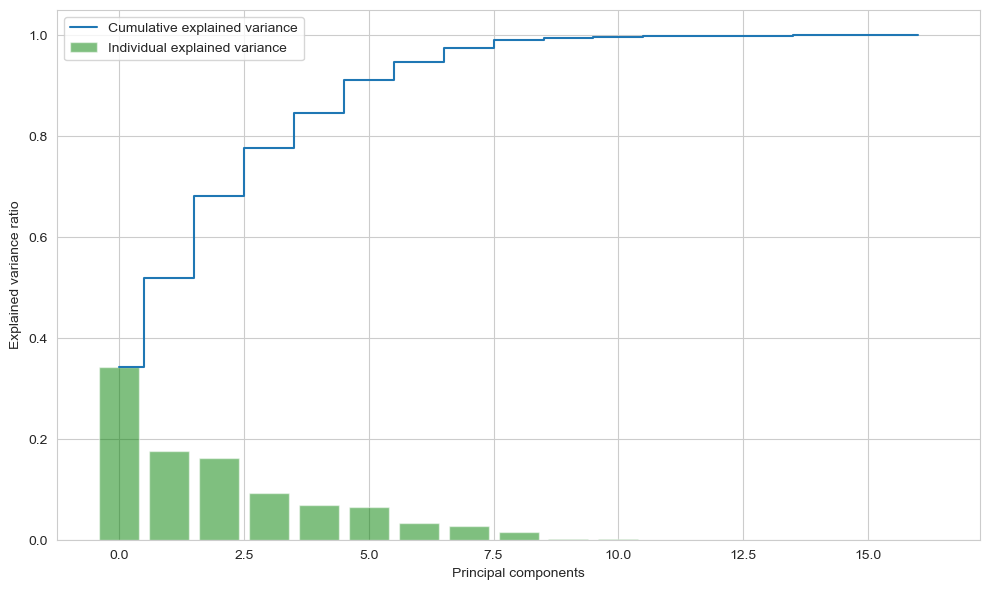

In [33]:
# Calculate the explained variance ratio for each component
explained_variance_ratio_numerical = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_variance_numerical = np.cumsum(explained_variance_ratio_numerical)

# Plot the explained variances
plt.figure(figsize=(10, 6))
plt.bar(range(len(explained_variance_ratio_numerical)), explained_variance_ratio_numerical, alpha=0.5, align='center',
        label='Individual explained variance', color='g')
plt.step(range(len(cumulative_variance_numerical)), cumulative_variance_numerical, where='mid',label='Cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [34]:
# Selecting the first 9 principal components
n_components = 9
selected_components = principal_components[:, :n_components]

# Creating a DataFrame for these selected components
df_pca = pd.DataFrame(data=selected_components)

# Naming the columns based on the most influential features for the first 9 components
components_df = pd.DataFrame(pca.components_, columns=columns_to_scale)
most_influential_features = components_df.abs().idxmax(axis=1)
pc_names = [f"PC{i+1}_{most_influential_features[i]}" for i in range(n_components)]
df_pca.columns = pc_names
df_pca["median_house_value"] = df_log_transformed["median_house_value"]

df_pca.head()

,PC1_households,PC2_latitude,PC3_median_income,PC4_population_per_bedroom,PC5_distance_to_coast,PC6_housing_median_age,PC7_housing_median_age,PC8_location_cluster,PC9_bedrooms_per_room,median_house_value
0,4.231882,-2.037202,1.552020,-0.882203,-0.466780,1.982671,-0.502204,0.367654,0.116390,452600.0
1,-2.661477,-3.041039,2.247763,-0.128827,0.350733,1.588907,-0.582039,0.730684,0.231908,358500.0
2,3.493186,-2.125177,1.536993,-0.713329,-0.479568,2.428789,0.635383,0.138895,-0.149178,352100.0
3,2.146391,-1.669074,0.025806,-0.737066,-0.628248,2.371195,0.146376,0.097061,0.266030,341300.0
4,1.729530,-1.660910,-0.603678,-1.207895,-0.727045,1.917011,0.599759,0.223233,-0.406165,342200.0


In [35]:
data_updated = df_pca.copy()

from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data_updated.drop(columns=['median_house_value']) 
y = data_updated['median_house_value']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((16512, 9), (4128, 9), (16512,), (4128,))

Step 1: Training the RandomForestRegressor
We'll begin by training the RandomForestRegressor with the hyperparameters provided, then predict on the test set, and finally evaluate the model using Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize and train the RandomForestRegressor model
regressor = RandomForestRegressor(n_estimators=120, random_state=0)
regressor.fit(X_train, y_train)
y_pred_rf = regressor.predict(X_test)

# Evaluate the RandomForestRegressor using the given metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

mae_rf, mse_rf, rmse_rf


(39388.87769097223, 3328894636.0266104, 57696.573867315645)

The evaluation metrics for the RandomForestRegressor are as follows:

* Mean Absolute Error (MAE): `$45,108.79`
* Mean Squared Error (MSE): `$4,111,111,265.30`
* Root Mean Squared Error (RMSE): `$64,117.95`

### The performance was really bad for this one, so won't use the PCA.